In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sns.set_theme()

In [2]:
first_name= "Hesam"
last_name= "Hosseini"
student_number= "400101034"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cp /content/drive/MyDrive/Deep_Learning/Heart_Disease_Dataset.csv /content/

In [6]:
df = pd.read_csv('/content/Heart_Disease_Dataset.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Q1

### A)

In [7]:
print(f'the size of DataSet is {df.shape}')

the size of DataSet is (1190, 12)


### B)

In [8]:
tot_nan = 0
for featurse in df:
  nan_count = df[featurse].isnull().sum()
  tot_nan += nan_count
  print(f'there are {nan_count} nan values for featurse {featurse}')
print(f'there are {tot_nan} nan values in the whole dataSet')

there are 0 nan values for featurse age
there are 0 nan values for featurse sex
there are 0 nan values for featurse chest pain type
there are 0 nan values for featurse resting bp s
there are 0 nan values for featurse cholesterol
there are 0 nan values for featurse fasting blood sugar
there are 0 nan values for featurse resting ecg
there are 0 nan values for featurse max heart rate
there are 0 nan values for featurse exercise angina
there are 0 nan values for featurse oldpeak
there are 0 nan values for featurse ST slope
there are 0 nan values for featurse target
there are 0 nan values in the whole dataSet


### C)

In [9]:
target = df['target']
taget_count = target.value_counts()
class1_count , class2_count = taget_count[0] , taget_count[1]
print(f'percentage of the first class is {100*class1_count/(class1_count+class2_count)}%')
print(f'percentage of the second class is {100*class2_count/(class1_count+class2_count)}%')

percentage of the first class is 47.142857142857146%
percentage of the second class is 52.857142857142854%


the data is nearly balance

### D)

In [33]:
# fig,ax = plt.subplots(2,2)
df0 = df[df['target']==0]
df1 = df[df['target']==1]
# df0[df0['sex']==1]='Male'
# df0[df0['sex']== 0]='Female'
# df1[df1['sex']== 1]='Male'
# df1[df1['sex']== 0]='Female'

Text(0, 0.5, 'Count')

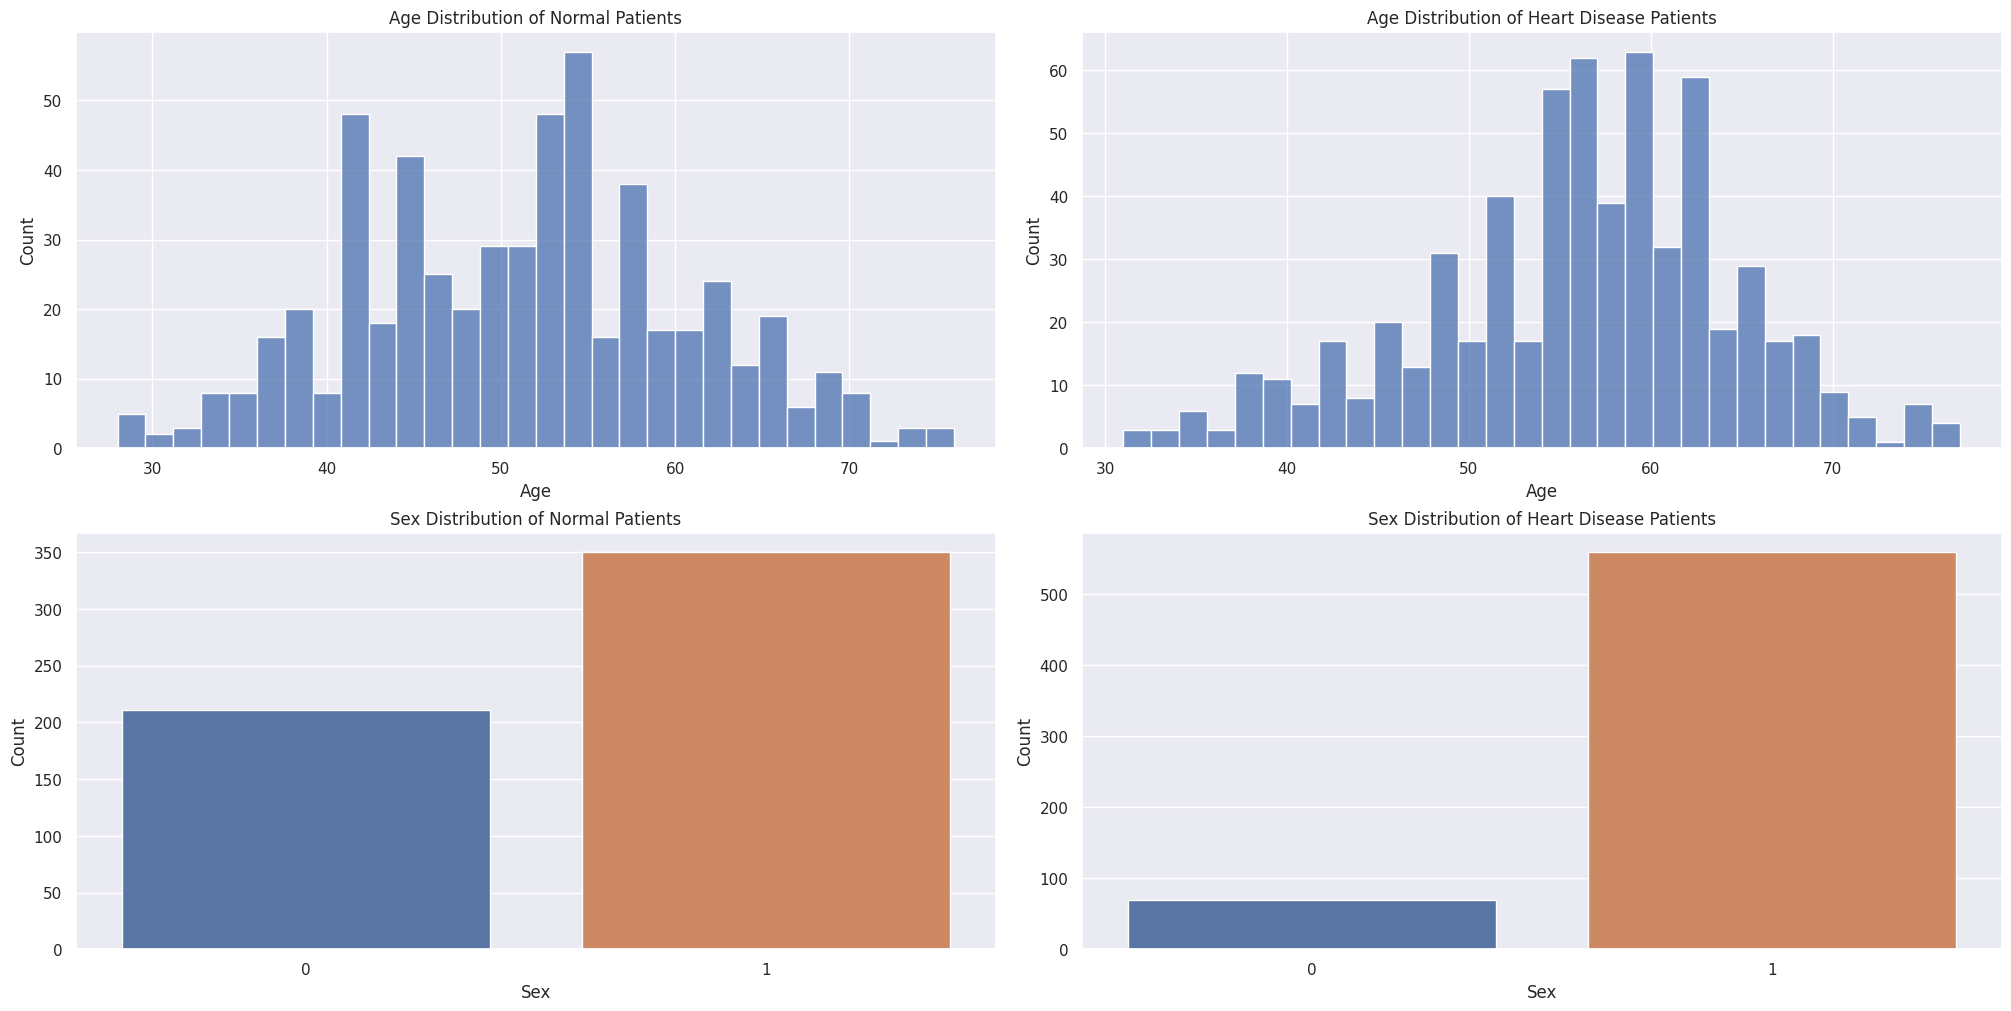

In [36]:
clos = 2
rows = 2
_, axes = plt.subplots(nrows=rows, ncols=clos, figsize=(20, 10),layout="constrained")
# plt.tight_layout()
sns.histplot(data=df0,x='age',bins=30,ax=axes[0,0])
axes[0, 0].set_title('Age Distribution of Normal Patients')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

sns.histplot(data=df1,x='age',bins=30,ax=axes[0,1])
axes[0, 1].set_title('Age Distribution of Heart Disease Patients')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')


# labels = ['']
sns.countplot(data=df0,x='sex',ax=axes[1,0])
axes[1, 0].set_title('Sex Distribution of Normal Patients')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')


sns.countplot(data=df1,x='sex',ax=axes[1,1])
axes[1, 1].set_title('Sex Distribution of Heart Disease Patients')
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Count')


## Q2

In [37]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_new = df[~outliers]
print(f'the size of DataSet after Z test is {df_new.shape}')

the size of DataSet after Z test is (1162, 12)


## Q3

In [38]:
df_normlized = df_new.copy()

In [39]:
df_new

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [40]:
numeric_cols = ['age','resting bp s','cholesterol','max heart rate','oldpeak']
for col in numeric_cols:
  scaler = MinMaxScaler()
  df_normlized[col] = scaler.fit_transform(df_new[[col]])#.values.reshape(-1, 1))


In [41]:
df_normlized

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1,1,0.285714,0.537678,0,0,0.481481,0,0.533333,2,1
1186,0.816327,1,4,0.609524,0.393075,1,0,0.548148,0,0.900000,2,1
1187,0.591837,1,4,0.476190,0.266802,0,0,0.355556,1,0.533333,2,1
1188,0.591837,0,2,0.476190,0.480652,0,2,0.792593,0,0.333333,2,1


## Q4

In [50]:
X = df_normlized.drop('target', axis=1)
y = df_normlized['target']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=30)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (813, 11)
y_train shape: (813,)
X_test shape: (349, 11)
y_test shape: (349,)


### a) linear

In [74]:
# Fit SVM with linear kernel
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Result with linear kernel:")
print('Accuracy', f'{accuracy_linear*100:.3f}%')
print('precision', f'{precision_linear*100:.3f}%')
print('recall', f'{recall_linear*100:.3f}%')
print('f1_score', f'{f1_linear*100:.3f}%')

Result with linear kernel:
Accuracy 82.235%
precision 82.065%
recall 83.889%
f1_score 82.967%


#### Grid Search

In [76]:
param_grid = {'C': [0.1, 1, 2.6, 10, 100 , 140], 'kernel': ['linear']}
svc = svm.SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_linear = grid_search.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)


best_C = grid_search.best_params_['C']
print(f"Best 'C' value: {best_C:.3f}")
print(f"Result with linear kernel and best C value : ")
print('Accuracy', f'{accuracy_linear*100:.3f}%')
print('precision', f'{precision_linear*100:.3f}%')
print('recall', f'{recall_linear*100:.3f}%')
print('f1_score', f'{f1_linear*100:.3f}%')

Best 'C' value: 100.000
Result with linear kernel and best C value : 
Accuracy 81.662%
precision 81.183%
recall 83.889%
f1_score 82.514%


### b)RBF

In [78]:
# Fit SVM with RBF kernel
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("Result with RBF kernel:")
print('Accuracy', f'{accuracy_rbf*100:.3f}%')
print('precision', f'{precision_rbf*100:.3f}%')
print('recall', f'{recall_rbf*100:.3f}%')
print('f1_score', f'{f1_rbf*100:.3f}%')

Result with RBF kernel:
Accuracy 83.954%
precision 82.979%
recall 86.667%
f1_score 84.783%


#### Grid Search

In [79]:
param_grid = {'C': [0.1, 1, 2.6, 10, 100], 'gamma': [0.1, 1, 2.6, 5.5 ,10, 40, 100], 'kernel': ['rbf']}
svc = svm.SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_rbf = grid_search.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']


print(f"Best 'C' value: {best_C:.3f}" ,'-----', f"Best 'gamma' value: {best_gamma:.3f}")
print("Result with RBF kernel and best C and gamma value:")
print('Accuracy', f'{accuracy_rbf*100:.3f}%')
print('precision', f'{precision_rbf*100:.3f}%')
print('recall', f'{recall_rbf*100:.3f}%')
print('f1_score', f'{f1_rbf*100:.3f}%')

Best 'C' value: 2.600 ----- Best 'gamma' value: 5.500
Result with RBF kernel and best C and gamma value:
Accuracy 85.673%
precision 84.574%
recall 88.333%
f1_score 86.413%


### c)polynomial

In [80]:
# Fit SVM with polynomial kernel
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_rbf_poly = f1_score(y_test, y_pred_poly)

print("Result with polynomial kernel:")
print('Accuracy', f'{accuracy_poly*100:.3f}%')
print('precision', f'{precision_poly*100:.3f}%')
print('recall', f'{recall_rbf*100:.3f}%')
print('f1_score', f'{recall_poly*100:.3f}%')

Result with polynomial kernel:
Accuracy 84.241%
precision 84.574%
recall 88.333%
f1_score 88.333%


#### Grid Search

In [81]:
param_grid = {'C': [0.1, 1, 2.6, 10, 100], 'degree': np.arange(1, 16, 1), 'kernel': ['poly']}
svc = svm.SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_poly = grid_search.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_rbf_poly = f1_score(y_test, y_pred_poly)
best_C = grid_search.best_params_['C']
best_deg = grid_search.best_params_['degree']


print(f"Best 'C' value: {best_C:.3f}" , f"Best 'degree' value: {best_deg:.3f}")
print("Result with polynomial kernel and best C and degree value:")
print('Accuracy', f'{accuracy_poly*100:.3f}%')
print('precision', f'{precision_poly*100:.3f}%')
print('recall', f'{recall_rbf*100:.3f}%')
print('f1_score', f'{recall_poly*100:.3f}%')

Best 'C' value: 10.000 Best 'degree' value: 7.000
Result with polynomial kernel and best C and degree value:
Accuracy 85.960%
precision 88.304%
recall 88.333%
f1_score 83.889%
